
# Cardiovascular disease prediction
<div style="background-color: #ebf3f5; border-bottom: 3px solid #022b36">
<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; background-color: #f6f6f6; border-radius: 8px; border-style: solid; border-color: #dbe8ec; padding: 20px; margin: 10px">


<p style="color:#262626">
In this section, we will work with a dataset containing data on cardiovascular disease. Begin by downloading the <a href="https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset">dataset from Kaggle</a> and read about what the different features mean. Note that this dataset contains many inaccuracies, such as negative blood pressure and blood pressure that is impossibly high.</p>

---

<h5 style="color:#000000">There are 3 types of input features:</h5><p style="color:#262626">
• Objective: factual information;<br>
• Examination: results of medical examination;<br>
• Subjective: information given by the patient.<br>

</p>
    </div>
    <div style="flex: 1.7; background-color: #f6f6f6; border-radius: 8px; padding: 2px; margin: 10px">
<img src='https://upload.wikimedia.org/wikipedia/commons/6/67/Heart_diagram_blood_flow_en.svg'>
    </div>
</div>

| Feature | Type | Variable | Data Type |
| --- | --- | --- | --- |
| Age | Objective | age | int (days) |
| Height | Objective | height | int (cm) |
| Weight | Objective | weight | float (kg) |
| Gender | Objective | gender | categorical code |
| Systolic blood pressure | Examination | ap_hi | int |
| Diastolic blood pressure | Examination | ap_lo | int |
| Cholesterol | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective | smoke | binary |
| Alcohol intake | Subjective | alco | binary |
| Physical activity | Subjective | active | binary |
| Presence or absence of cardiovascular disease | Target | cardio | binary |

<br>

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/cardio_train.csv',
                sep = ';', index_col = False).iloc[:, 1:] # exclude id column

In [2]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


## 1.0 - Finding inaccuracies

As stated in the task description, there should be many inaccuracies in the dataset, so let's look for those.
I've made a list of all the features and what to check, etc.

0 Age
- Check for negative or extreme values
- Convert age from days to years ```(lambda x: round(x/365.25))```

1 Gender
- Check values
- Replace 0 with man and 1 with woman
 
2 Height
3 Weight
- Check for incorrectly inputed self-reported data
- Create BMI column 
- Remove BMI < 14 & > 50 ```(mask = (df['bmi'] >= 14) & (df['bmi'] <= 50))```

4 ap_hi (Systolic BP)<br>
5 ap_lo (Diastolic BP)
- Check for unrealistic BP values
- Remove unrealistic values (some were *really* extreme)

 6   cholesterol  
 7   gluc         
 8   smoke        
 9   alco         
 10  active
- All of these are binary, shouldn't be much of an issue.

 11  cardio
 - Target variable, no accuracies found.

### Finding inaccuracies 0: Age

In [4]:
# Convert days to year for age column
df['age'] = df['age'].apply(lambda x: round(x/365.25))

In [5]:
df['age'].min(), df['age'].max(), df['age'].mean()

(30, 65, 53.303157142857145)

In [6]:
len(df['age'].unique())

28

[]

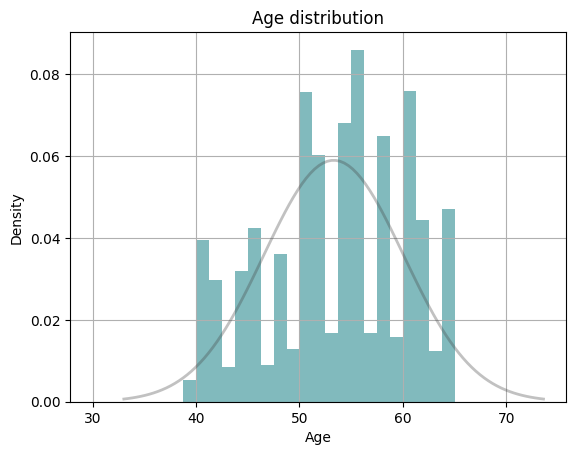

In [7]:
import numpy as np

# Hex colors for testing palettes
semi_dark_orange = '#ee5541'
mintish = '#81babd'
dark_dentist = '#022b36'

plt.hist(df['age'], bins=len(df['age'].unique()), density=True, color=mintish)


# Overlay a normal distribution curve
mu, std = df['age'].mean(), df['age'].std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2)), linewidth=2, color='#444444', alpha=0.33)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution')
plt.grid()
plt.plot()

No inaccuracies found.

Interesting spread though.

---

### Finding inaccuracies 1: Gender

In [8]:
df['gender'].unique(), df['gender'].value_counts()

(array([2, 1]),
 1    45530
 2    24470
 Name: gender, dtype: int64)

In [9]:
df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)

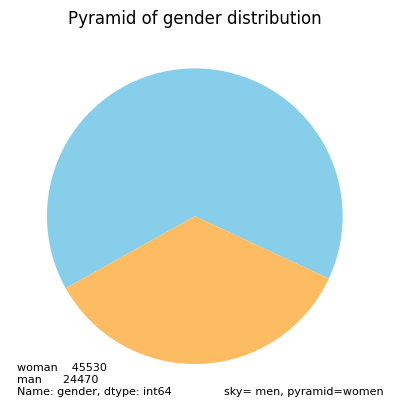

In [10]:
plt.pie(df['gender'].value_counts(), startangle=-25, colors=['#87ceeb','#fdbc62',])
plt.title('Pyramid of gender distribution')
plt.text(s="sky= men, pyramid=women",x=0.2,y=-1.2,fontsize=8)
plt.text(s=f"{df['gender'].value_counts()}",x=-1.2,y=-1.2,fontsize=8)
plt.show()

No inaccuracies found.

---

### Finding inaccuracies 2 & 3: Height & Weight

In [11]:
df['height'].mean(), df['weight'].mean(), df['weight'].min(), df['height'].min(), df['weight'].max(), df['height'].max()

(164.35922857142856, 74.20569, 10.0, 55, 200.0, 250)

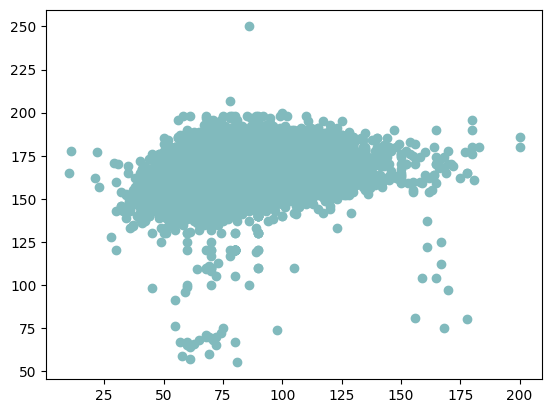

In [12]:
plt.scatter(y=df['height'],x=df['weight'], c=mintish)
plt.show()

In [13]:
def get_bmi(weight,height):
    return weight / (height*0.01)**2

get_bmi(62.2,188)

17.598460842009956

In [14]:
df['bmi'] = df.apply(lambda x: get_bmi(x['weight'], x['height']), axis=1)

In [15]:
df['bmi'].sort_values()

33817      3.471784
57858      3.673095
29488      7.022248
60188      8.001829
26806      9.331007
            ...    
29157    191.666667
23913    237.768633
22723    267.768595
27384    278.125000
12770    298.666667
Name: bmi, Length: 70000, dtype: float64

#### What's a reasonable BMI?

I consulted a doctor, she told me <em>One cannot have a BMI below 10 or above 50.</em> I said ok doc.

"man kan leva när man e över 30 (BMI) men d svår att leva om man e mer på d låga" - doktor Frehner

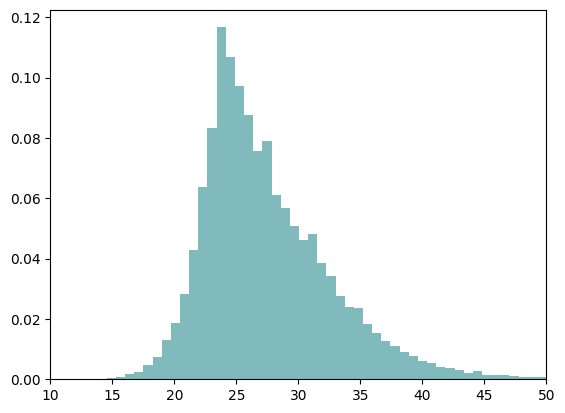

In [16]:
plt.hist(df['bmi'], bins=400, density=True, color=mintish)
plt.xlim(10,50)
plt.show()

In [17]:
# Drop all rows with BMI < 10 and > 50
mask = (df['bmi'] >= 14) & (df['bmi'] <= 50)
df = df.drop(df[~mask].index)

In [18]:
print(f'{len(mask) - len(df)} rows removed due to unrealistic BMI.')

257 rows removed due to unrealistic BMI.


Rows removed: 257

---

### Finding inaccuracies 4 & 5: Systolic & Diastolic BP (ap_hi, ap_lo)

In [19]:
print(df['ap_hi'].min(), df['ap_lo'].min())
print(df['ap_hi'].max(), df['ap_lo'].max())

-150 -70
16020 11000


In [20]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


#### What's a reasonable BP?

Once again I consulted ze doctor. She told me she was busy and that I should do my own work. So I tried the good ol' google.

Optimal blood pressure is less than 120/80[mm Hg]* (systolic/diastolic).$^{[1]}$

When an individual is approaching death, the systolic blood pressure will typically drop below 95mm Hg.$^{[2]}$

Hypertensive crisis: higher than 180 systolic and/or higher than 120 diastolic.$^{[3]}$

<p>*editor's note</p>

$[1]$ https://www.webmd.com/heart/understanding-low-blood-pressure-basics <br>
$[2]$ https://www.crossroadshospice.com/hospice-resources/end-of-life-signs/blood-pressure/ <br>
$[3]$ https://www.healthline.com/health/diastole-vs-systole#blood-pressure-ranges <br>



In [21]:
# Drop all rows with ap_hi (systolic) < 95 and > 190
mask1 = (df['ap_hi'] >= 95) & (df['ap_hi'] <= 190)
df = df.drop(df[~mask1].index)

In [22]:
# Drop all rows with ap_lo (diastolic) < 70 and > 130
mask2 = (df['ap_lo'] >= 50) & (df['ap_lo'] <= 130)
df = df.drop(df[~mask2].index)

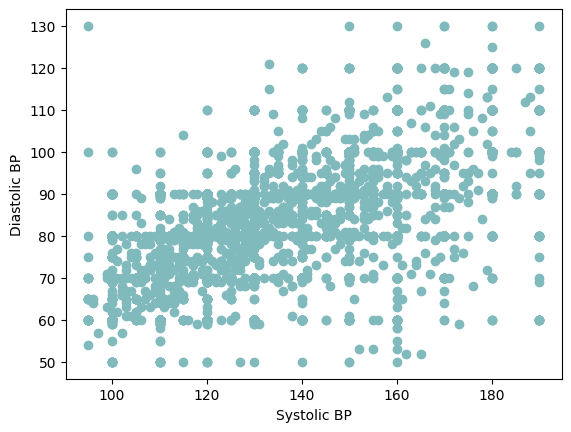

In [23]:
plt.scatter(x=df['ap_hi'],y=df['ap_lo'], c=mintish)
plt.xlabel("Systolic BP")
plt.ylabel("Diastolic BP")
plt.show()

In [24]:
70000 - len(mask1) + 70000 - len(mask2) 

2029

Rows removed: 2029

Diastolic blood pressure cannot be higher than systolic blood pressure, but how big can the difference be?

There are some interesting patterns here. We can see that 80 and 90 mm Hg are the most common diastolic pressures. There are also some central tendencies at 70, perhaps suggesting that the measured pressure has been rounded off.

Systolic pressure seem to be evenly(ish) distributed among the 110 to 150, again with increments of 10.

I'm not entirely sure as of why this happens but I'm going to assume, as previous stated, that the pressure often is rounded.

Also noteworthy is the systolic pressure of 160 mm Hg. It seems to be present throughout most of the diastolic counterpoints.

---

### Finding inaccuracies 6-11: Cholesterol, Glucose, Smoking, Alcohol, Physical Activity, Cardiovascular Disease

In [25]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for col in columns:
    print(df[col].value_counts())

1    50417
2     9061
3     7753
Name: cholesterol, dtype: int64
1    57196
3     5124
2     4911
Name: gluc, dtype: int64
0    61306
1     5925
Name: smoke, dtype: int64
0    63638
1     3593
Name: alco, dtype: int64
1    54017
0    13214
Name: active, dtype: int64
0    33712
1    33519
Name: cardio, dtype: int64


No inaccuracies found.

---

In [26]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


## 2.0 - EDA Warmup

a) How many people are positive for cardiovascular disease?

In [27]:
print(f"{df['cardio'].value_counts()[0]} negative, {(df['cardio'].value_counts(normalize=True)[0])*100:.4f}%")
print(f"{df['cardio'].value_counts()[1]} positive, {(df['cardio'].value_counts(normalize=True)[1])*100:.4f}%")

33712 negative, 50.1435%
33519 positive, 49.8565%


 b) What percentage of people have normal, above normal, and well above normal cholesterol levels? 

 Create a piechart.

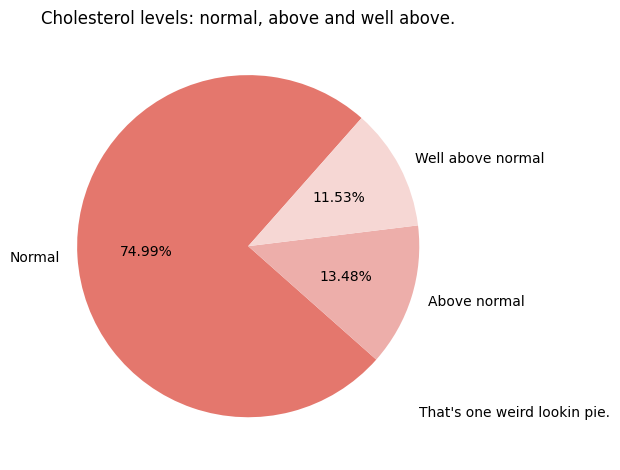

In [28]:
labels = ['Normal', 'Above normal', 'Well above normal']
chol_vals = df['cholesterol'].value_counts()
pieces = [chol_vals.loc[1],chol_vals.loc[2],chol_vals.loc[3]]
#f6d7d4
#A9A9A9
colors = ['#f6d7d4','#7393B3',mintish]

flesh0 = '#f6d7d4'
flesh1 = '#edaeaa'
flesh2 = '#e88c84'
flesh3 = '#e4776d' 
 
fig1, ax1 = plt.subplots()
ax1.pie(pieces, colors = [flesh3, flesh1, flesh0], labels=labels, autopct='%1.2f%%', startangle=48.5)
plt.title('Cholesterol levels: normal, above and well above.')
fig = plt.gcf()
plt.tight_layout()
plt.text(1, -1, "That's one weird lookin pie.")
plt.show()

c) What is the age distribution? Create a histogram.

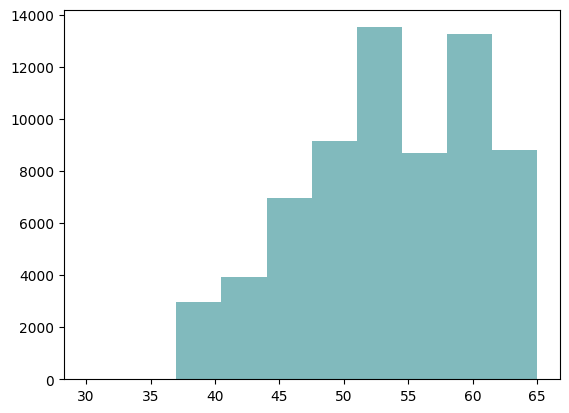

In [29]:
plt.hist(df['age'], color=mintish, lw=0.5)
plt.show()

d) What percentage of people smoke?

In [30]:
df['smoke'].value_counts(normalize=True)*100

0    91.187101
1     8.812899
Name: smoke, dtype: float64

e) What is the weight distribution?
Create a suitable diagram.

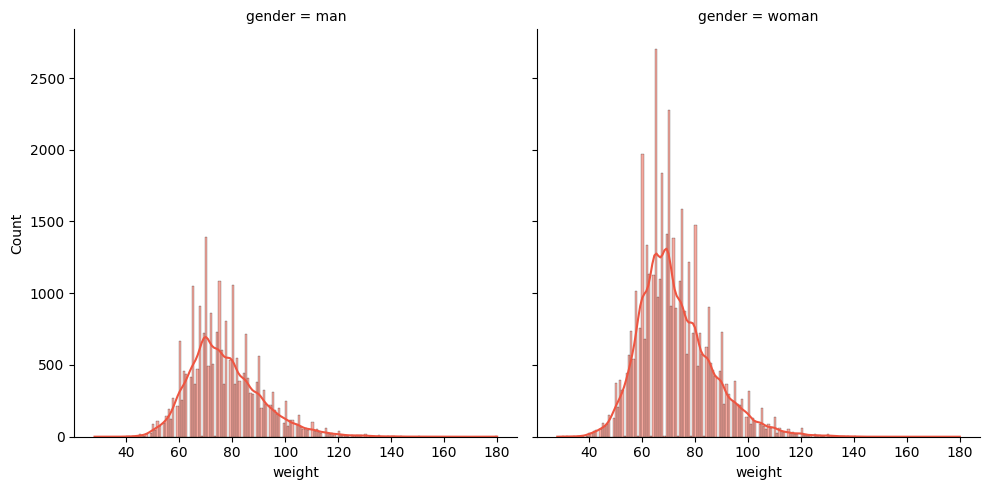

In [31]:
sns.displot(df, x="weight", col="gender", color=semi_dark_orange, kde=True)
plt.show()

In [32]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


f) What is the height distribution?
Create a suitable diagram.

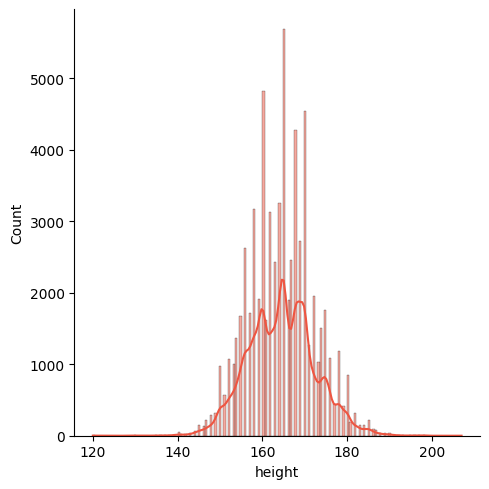

In [33]:
# f) What is the height distribution? Create a suitable diagram.
sns.displot(df,x="height", kde=True, color=semi_dark_orange)
plt.show()

g) What percentage of women and men have cardiovascular disease?
Create a suitable diagram.

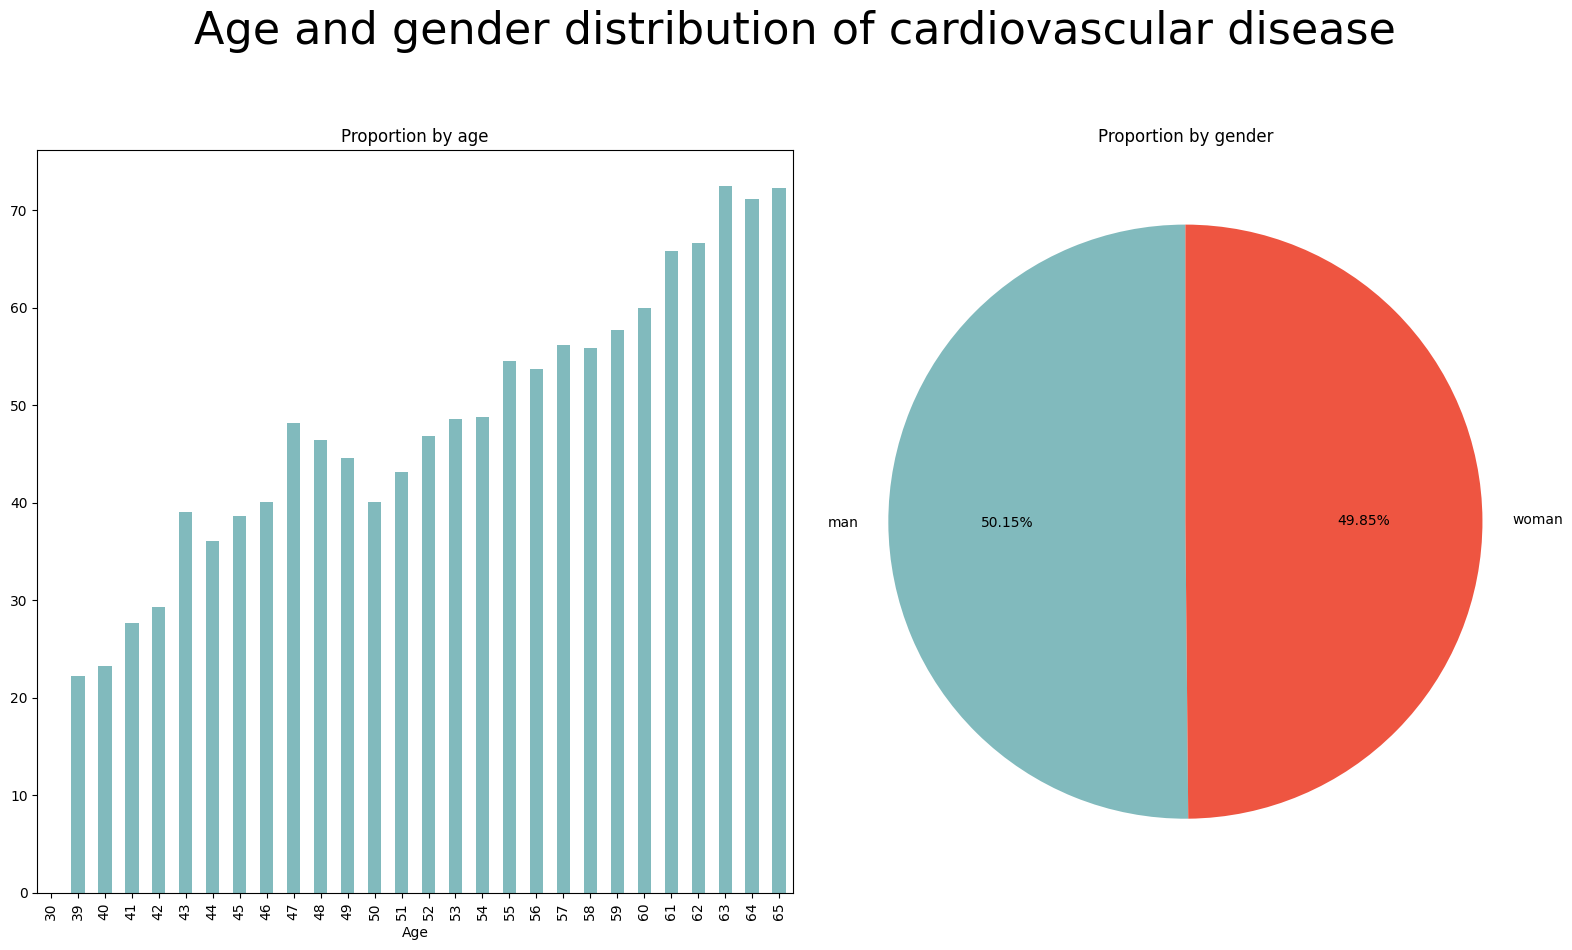

In [34]:
grouped_age = df.groupby('age')['cardio'].mean() * 100
grouped_gender = df.groupby('gender')['cardio'].mean() * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

grouped_age.plot(kind='bar', ax=ax1, color=mintish, lw=0.5)
ax1.set_xlabel('Age')
ax1.set_title('Proportion by age')

grouped_gender.plot(kind='pie', ax=ax2, colors=[mintish, semi_dark_orange], startangle=90, autopct='%1.2f%%')
ax2.set_title('Proportion by gender')
ax2.axes.yaxis.set_visible(False)

fig.suptitle('Age and gender distribution of cardiovascular disease', fontsize=32, y=1.05)
plt.tight_layout()
plt.show()


## 2.1.0 - Feature engineering BMI 

<div style="background-color: #ebf3f5; border-bottom: 3px solid #022b36">
<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; padding: 40px; margin: 0px;">

<h2 style="color: #262626">Feature engineering</h2>
<p style="color:#000000">Create a feature for BMI (Body Mass Index), read about <a href="https://en.wikipedia.org/wiki/Body_mass_index">the formula on wikipedia</a>.<br><br>
a) Throw away the samples with unreasonable BMIs and outliers. Note that this can be difficult to determine in which range of BMIs we should save. Describe how you arrive at the limits.<br><br>
b) Create a categorical BMI feature with the categories: normal range, overweight, obese (class I), obese (class II), obese (class III).</p>
    </div>
</div></div>

In [35]:
# Categorical BMI
df_bmi = pd.read_html('https://en.wikipedia.org/wiki/Body_mass_index')[2] # Read table from Wikipedia

In [36]:
import re

# Drop column BMI Prime
df_bmi.drop(df_bmi.columns[2], axis=1, inplace=True)

# Find and extract floats
extract_floats = lambda x: re.findall('([+-]?[0-9]*\.[0-9]*)', x)
df_bmi['floats'] = df_bmi['BMI (kg/m2)[c]'].apply(extract_floats)

# Drop old BMI col
df_bmi.drop(df_bmi.columns[1], axis=1, inplace=True)
df_bmi[['Lower_Bound', 'Upper_Bound']] = df_bmi['floats'].apply(lambda x: pd.Series([x[0], x[-1]]))

# Replace lower and upper with inf values
df_bmi.loc[df_bmi.index[0], 'Lower_Bound'] = -np.inf
df_bmi.loc[df_bmi.index[-1], 'Upper_Bound'] = np.inf

# Make sure they're floats
df_bmi['Lower_Bound'] = df_bmi['Lower_Bound'].astype(float)
df_bmi['Upper_Bound'] = df_bmi['Upper_Bound'].astype(float)

# Drop old float column
df_bmi.drop(df_bmi.columns[1], axis=1, inplace=True)

In [37]:
df_bmi # Ok, doing this manually would've been like 40 times faster...

,Category,Lower_Bound,Upper_Bound
0,Underweight (Severe thinness),-inf,16.0
1,Underweight (Moderate thinness),16.0,16.9
2,Underweight (Mild thinness),17.0,18.4
3,Normal range,18.5,24.9
4,Overweight (Pre-obese),25.0,29.9
5,Obese (Class I),30.0,34.9
6,Obese (Class II),35.0,39.9
7,Obese (Class III),40.0,inf


In [38]:
def get_bmi_category(bmi):
    for i in range(len(df_bmi)):
        if bmi >= df_bmi.loc[i, 'Lower_Bound'] and bmi <= df_bmi.loc[i, 'Upper_Bound']:
            return df_bmi.loc[i, 'Category']
    return np.nan

# Round BMI values to 1 decimal and apply mapping for categories
df['bmi_category'] = df['bmi'].round(1).apply(get_bmi_category)

In [39]:
df['bmi_category'].value_counts()

Overweight (Pre-obese)             24717
Normal range                       24300
Obese (Class I)                    11893
Obese (Class II)                    4197
Obese (Class III)                   1577
Underweight (Mild thinness)          414
Underweight (Moderate thinness)       88
Underweight (Severe thinness)         45
Name: bmi_category, dtype: int64

In [40]:
# Remove ' thinness' from underweight categories
df['bmi_category'] = df['bmi_category'].str.replace(r'\b thinness\b', '', regex=True)

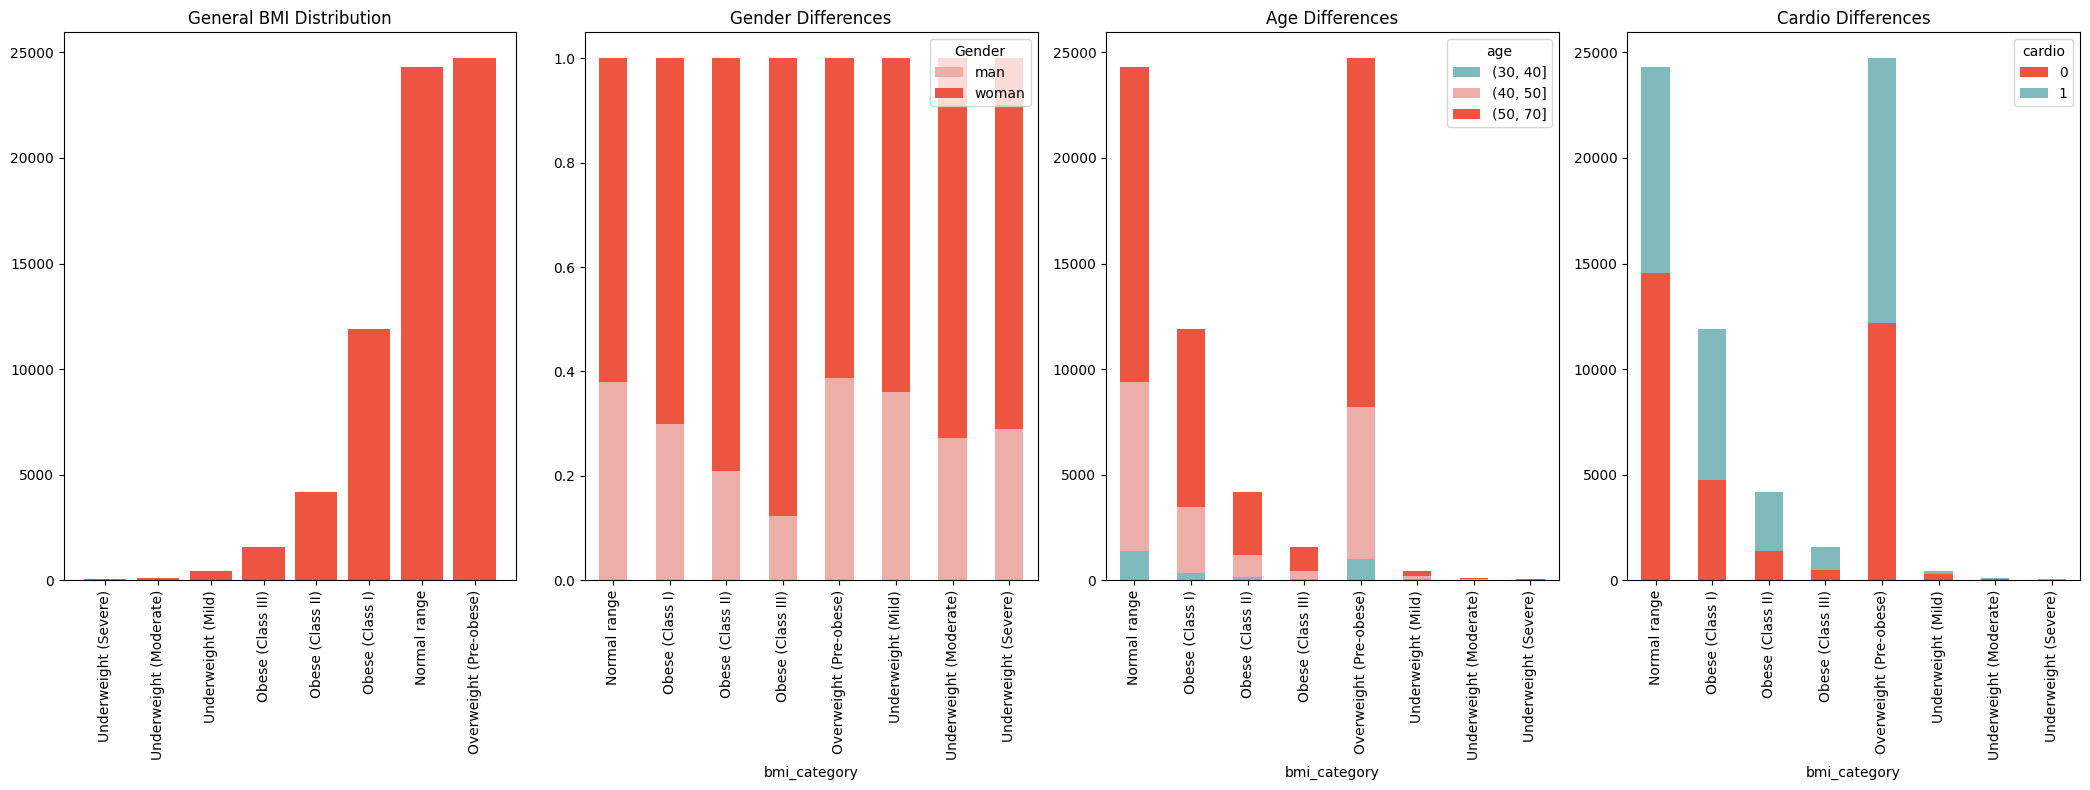

In [41]:
# Count occurrences of each BMI category
category_counts = df['bmi_category'].value_counts(ascending=True)

# Count occurrences of each gender in each BMI category
gender_counts = df.groupby(['bmi_category', 'gender'])['gender'].count().unstack()

# Count occurrences of each age group (30-40-50-70) in each BMI category
age_counts = df.groupby(['bmi_category', pd.cut(df['age'], [30, 40, 50, 70])])['age'].count().unstack()

# Count occurrences of each cardio status in each BMI category
cardio_counts = df.groupby(['bmi_category', 'cardio'])['cardio'].count().unstack()

# Create a 2x2 grid of plots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(21, 8))

# General BMI categories
axs[0].bar(category_counts.index, category_counts.values, color=semi_dark_orange)
axs[0].set_title('General BMI Distribution')
axs[0].tick_params(axis='x', rotation=90)

# Gender category is imbalanced because there are twice as many women as there are men.
# It can and *will* result in a misleading representation of unless we normalize the data by using percentages.

gender_counts = df.groupby(['bmi_category', 'gender'])['gender'].count().unstack()
gender_perc = gender_counts.div(gender_counts.sum(axis=1), axis=0)

gender_perc.plot(kind='bar', stacked=True, ax=axs[1], color=[flesh1, semi_dark_orange])
axs[1].set_title('Gender Differences')
axs[1].legend(title='Gender')
axs[1].tick_params(axis='x')

# Stacked bar chart of age differences
age_counts.plot(kind='bar', stacked=True, ax=axs[2], color=[mintish, flesh1, semi_dark_orange])
axs[2].set_title('Age Differences')
axs[2].tick_params(axis='x')

# Stacked bar chart of cardio differences
cardio_counts.plot(kind='bar', stacked=True, ax=axs[3], color=[semi_dark_orange, mintish])
axs[3].set_title('Cardio Differences')
axs[3].tick_params(axis='x')
plt.tight_layout()

plt.show()


TODO: Gender plot does not seem right even though I tried plotting percentage... I'll have to check on that later. TODO

Also TODO: Write formal analysis

In [42]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'bmi_category'],
      dtype='object')

In [43]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class I)
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight (Pre-obese)
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range


### 2.1.1 - Feature engineering bloodpressure    

<div style="background-color: #ebf3f5; border-bottom: 3px solid #022b36">
<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; padding: 40px; margin: 0px;">

<h2 style="color:#262626">Feature engineering</h2>
<p style="color:#000000">Discard samples with unreasonable blood pressure and outliers, similar to task 2.1.0, it is not trivial to set the boundaries. Create a feature for blood pressure categories according to the table in <a href="https://www.healthline.com/health/high-blood-pressure-hypertension#definition">this article</a>. Describe how you will determine the boundaries.
<br><br>
I already did the discarding. But I will create a feature of categories based on this table!
</p>
    </div>
    <div style="flex: 3; background-color: #ebf3f5">
<img src="https://post.healthline.com/wp-content/uploads/2021/10/1535730-Everything-You-Need-to-Know-About-High-Blood-Pressure-Hypertension-1296x1109-Body.jpg" width="100%">
</div></div></div>

In [44]:
df_bp = pd.DataFrame()

bp_dict = {'Healthy': ['<120', 'and <80'], 
           'Elevated': ['120-129', 'and <80'], 
           'Stage 1 hypertension': ['130-139', 'or 80-89'], 
           'Stage 2 hypertension': ['140>', 'or >90'], 
           'Hypertensive crisis': ['>180', 'or >120']}

df_bp = pd.DataFrame.from_dict(bp_dict, orient='index', columns=['Systolic', 'Diastolic'])
df_bp = df_bp.reset_index().rename(columns={'index': 'Category'})

df_bp = df_bp[['Systolic', 'Diastolic', 'Category']]

df_bp

,Systolic,Diastolic,Category
0,<120,and <80,Healthy
1,120-129,and <80,Elevated
2,130-139,or 80-89,Stage 1 hypertension
3,140>,or >90,Stage 2 hypertension
4,>180,or >120,Hypertensive crisis


In [45]:
# We could just write if statements for ap_hi and ap_lo
# This might look stupid but sit tight cause here we go

def get_bp_category(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return "Healthy"
    elif 120 <= ap_hi <= 129 and ap_lo < 80:
        return "Elevated"
    elif (130 <= ap_hi <= 139) or (80 <= ap_lo <= 89):
        return "Stage 1 hypertension"
    elif (ap_hi >= 140) or (ap_lo >= 90):
        return "Stage 2 hypertension"
    elif (ap_hi > 180) or (ap_lo > 120):
        return "Hypertensive crisis"
    else:
        return "Invalid values"

In [46]:
# Insert new column with values from get_bp_function()
df.insert(6, 'bp_category', df.apply(lambda row: get_bp_category(row['ap_hi'], row['ap_lo']), axis=1))

In [47]:
df

,age,gender,height,weight,ap_hi,ap_lo,bp_category,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,50,man,168,62.0,110,80,Stage 1 hypertension,1,1,0,0,1,0,21.967120,Normal range
1,55,woman,156,85.0,140,90,Stage 2 hypertension,3,1,0,0,1,1,34.927679,Obese (Class I)
2,52,woman,165,64.0,130,70,Stage 1 hypertension,3,1,0,0,0,1,23.507805,Normal range
3,48,man,169,82.0,150,100,Stage 2 hypertension,1,1,0,0,1,1,28.710479,Overweight (Pre-obese)
4,48,woman,156,56.0,100,60,Healthy,1,1,0,0,0,0,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,woman,165,80.0,150,80,Stage 1 hypertension,1,1,0,0,1,1,29.384757,Overweight (Pre-obese)
69995,53,man,168,76.0,120,80,Stage 1 hypertension,1,1,1,0,1,0,26.927438,Overweight (Pre-obese)
69997,52,man,183,105.0,180,90,Stage 2 hypertension,3,1,0,1,0,1,31.353579,Obese (Class I)
69998,61,woman,163,72.0,135,80,Stage 1 hypertension,1,2,0,0,0,1,27.099251,Overweight (Pre-obese)


lgtm!

## 2.2.0 - Visualize proportions

Create barplots with a feature against the proportion of positives for cardiovascular disease. For example, blood pressure categories against the proportion of positives, BMI category against the proportion of positives, etc. Make these plots in a figure with multiple subplots.

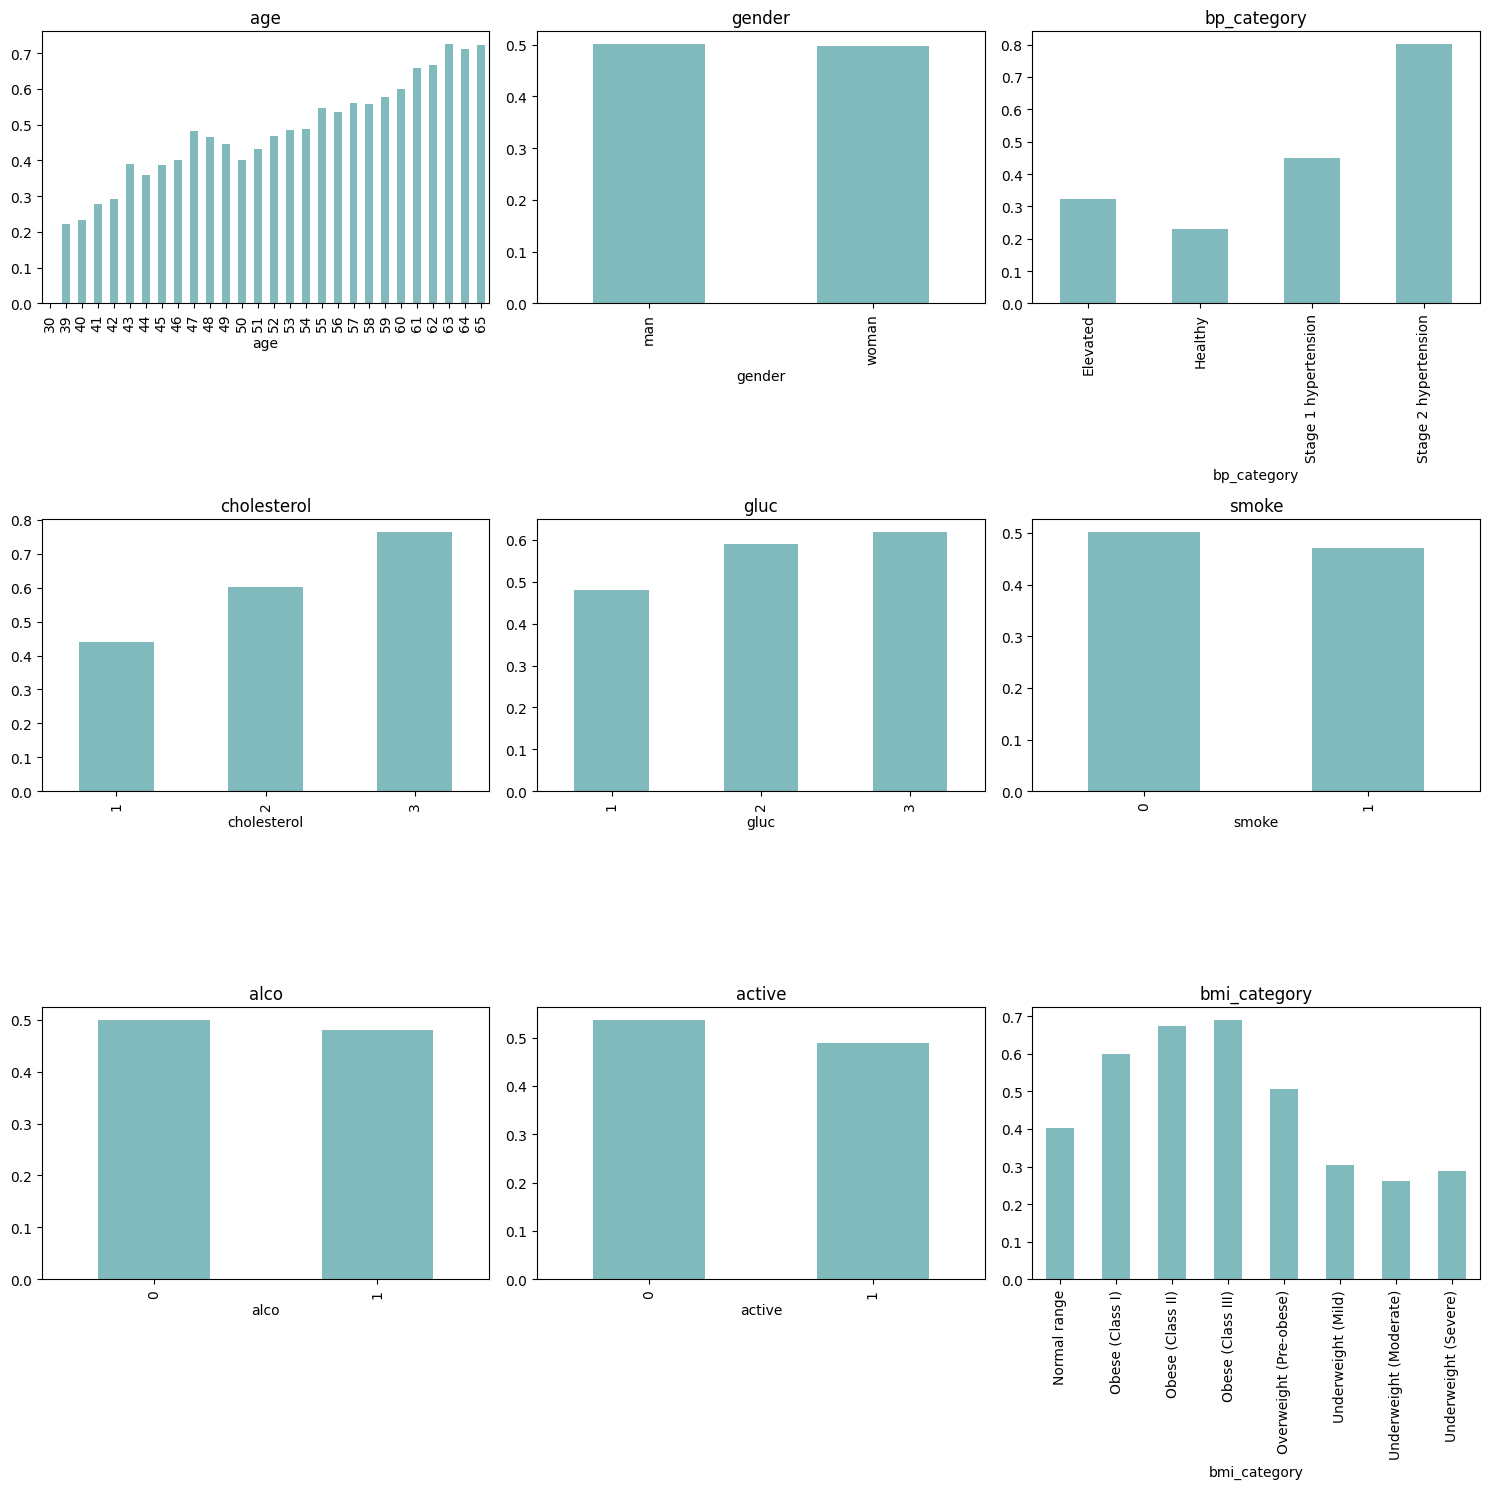

In [48]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(['age', 'gender', 'bp_category', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category']):
    row, col = i // 3, i % 3 # row and column indices for feature of current loop

    # Mean to get proportions, this *will* be inbalanced TODO: look into how to adjust this better than mean()?? also TODO if time: style
    df.groupby(feature)['cardio'].mean().plot(kind='bar', ax=axs[row, col], color=mintish)
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

TODO: Write formal analysis

### 2.2.1 - Visualization of correlations

Create a heatmap of correlations and see if you can find features that are strongly correlated, i.e., close to 1, or features that are strongly negatively correlated, i.e., close to -1. Can you explain why they may be correlated?

In [49]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,bp_category,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,50,man,168,62.0,110,80,Stage 1 hypertension,1,1,0,0,1,0,21.967120,Normal range
1,55,woman,156,85.0,140,90,Stage 2 hypertension,3,1,0,0,1,1,34.927679,Obese (Class I)
2,52,woman,165,64.0,130,70,Stage 1 hypertension,3,1,0,0,0,1,23.507805,Normal range
3,48,man,169,82.0,150,100,Stage 2 hypertension,1,1,0,0,1,1,28.710479,Overweight (Pre-obese)
4,48,woman,156,56.0,100,60,Healthy,1,1,0,0,0,0,23.011177,Normal range


<Axes: >

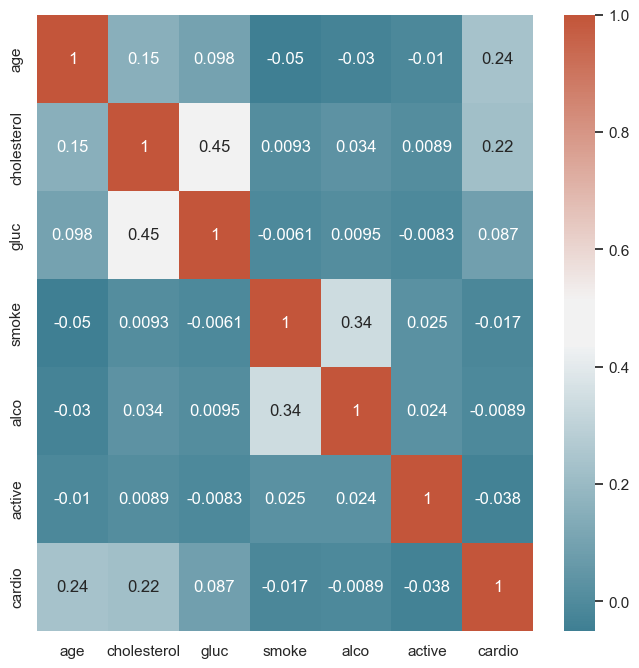

In [50]:
# Correlation matrix with categorical features
corr = df.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'bmi'], axis=1).corr(numeric_only=True)

# Color palette for the colorblind creatures
palette = sns.color_palette("colorblind")

# And a bigger figsize for nearsigthed teachers
sns.set(rc={'figure.figsize':(8,8)})

# Now display the heatmap like it is my leisure
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), annot=True)

Corrrelation description:

todo: write formal analysis


## 2.3 - Create two sets

Create a copy of your dataframe. With the first copy:

- remove features: *ap_hi, ap_lo, height, weight, BMI*
- dummy encoding: *BMI-category, BP-category, and gender*

With the second copy:

- remove features: *BMI-category, BP-category, height, weight*
- dummy encoding: *gender*

In [51]:
# Remove underweight rows as implied in 2.1.0 b)
rows_dropped = df.shape[0]
categories_to_drop = ['Underweight (Mild)', 'Underweight (Moderate)', 'Underweight (Severe)']
df = df[~df['bmi_category'].isin(categories_to_drop)]
rows_dropped -= df.shape[0]
print(f"{rows_dropped} rows dropped.")

# Round BMI values to nearest integer. This will hopefully speed up the models later.
df['bmi'] = df['bmi'].round().astype(int)

547 rows dropped.


/var/folders/5h/sxsv24qn7px_bth2j_yzldlr0000gn/T/ipykernel_84525/3886064244.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].round().astype(int)


In [52]:
df.shape

(66684, 15)

In [53]:
df1 = pd.get_dummies(df.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'bmi'], axis=1),
                            columns=['bmi_category', 'bp_category', 'gender'], drop_first=True)

df2 = pd.get_dummies(df.drop(['height', 'weight', 'bp_category', 'bmi_category'], axis=1),
                            columns=['gender'], drop_first=True)

## 2.4 - Choose models

Choose 3-5 machine learning models, preferably as different as possible. For each dataset we created in task 2.3, do the following:

- train|validation|test split
- scale the dataset with feature standardization and normalization (they are not done at the same time, but in different rounds)
- define hyperparameters (param_grids) to test for each model
- use ```GridSearchCV()``` and choose a suitable evaluation metric
- make predictions on validation data, calculate and save evaluation score for your chosen metric
- check the best parameters for each model

Which dataset do you choose and which model do you choose? Use the model you have chosen and train on all data except the test data.

### 2.4.1 - train|val|test split function

In [54]:
from sklearn.model_selection import train_test_split

def split_data(df, target='cardio', test_size=0.25, val_size=0.20, rng=42):
    """
    Split DataFrame into train, validation, and test sets.

    Args:
    df (pandas.DataFrame): Input DataFrame to split
    target (str): Target variable name
    test_size (float): Proportion of data to use for test set (default: 0.25)
    val_size (float): Proportion of train data to use for validation set (default: 0.20)
    random_state (int): Random state (default: 42)

    Returns:
    X_train (pandas.DataFrame): Training data
    X_val (pandas.DataFrame): Validation data
    X_test (pandas.DataFrame): Test data
    y_train (pandas.Series): Target variable for training data
    y_val (pandas.Series): Target variable for validation data
    y_test (pandas.Series): Target variable for test data
    """

    # Error checking
    if target not in df.columns:
        raise ValueError(f"{target} not found in DataFrame columns.")

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size=test_size, random_state=rng)

    # Split train data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=rng)

    return X_train, X_val, X_test, y_train, y_val, y_test


In [55]:
df1.shape, df2.shape

((66684, 15), (66684, 11))

In [56]:
# Testing the models with very small fractions.
df1_frac, df2_frac = df1.sample(frac=0.004), df2.sample(frac=0.004)
df1_frac.shape, df2_frac.shape

((267, 15), (267, 11))

In [57]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df1_frac)
X2_train, X2_val, X2_test, y2_train, y2_val, y2_test = split_data(df2_frac)

In [58]:
X2_train

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,gender_woman
65414,44,130,90,1,1,0,0,1,25,1
59776,62,120,80,2,1,1,0,1,28,0
26047,60,130,80,2,2,0,0,1,31,1
8530,50,140,98,2,2,0,0,1,23,1
2445,56,130,80,2,1,1,1,1,30,0
...,...,...,...,...,...,...,...,...,...,...
27496,56,120,80,1,1,0,0,1,25,1
68609,52,120,80,1,1,0,0,1,24,0
37040,60,150,90,1,1,0,0,1,25,0
65197,43,110,80,2,2,0,0,1,26,1


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### 2.4.2 RF Classifier

<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; background-color: #ebf3f5; padding: 40px; margin: 0px; border-bottom: 3px solid #022b36">
<h2 style="color:#262626">🌲 RandomForestClassifier</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">sklearn.ensemble.RandomForestClassifier</a>
<p style="color:#000000">Non-parametric model.
<br><br>
<b>Weights:</b><br><br>
• n_estimator:<br>The number of trees in the forest.<br><br>
• max_depth:<br>Maximum depth of the tree.<br><br>
• min_sample_split:<br>Minimum number of samples required to split an internal node.<br><br>
• min_samples_leaf:<br>Minimum number of samples required to be at a leaf node.<br><br>
• max_features:<br>Number of features to consider when looking for the best split<br><br>
</p>
    </div>
    <div style="flex: 3; background-color: #ebf3f5; padding: 40px; margin: 0px; border-bottom: 3px solid #022b36">
<p style="color:#000000"><b>Pros:</b><br>
• Robust to outliers<br>
• Works well with non-linear data<br>
• Lower risk of overfitting<br>
• Runs efficiently on a large dataset<br>
• Better accuracy than other classification algorithms<br>

<p style="color:#000000"><b>Cons:</b><br>
• Requires computational power as it builds numerous trees<br>
• Requires time for to combine lot of decision trees<br>
<br>

</p>
<div style="background-color:#444654; border-radius: 8px; border-style: solid; border-color: #353740; margin: 5px; padding:10px">
<p style="color:#ffffff">🤖 <b>ChatGPT says:</b><br></p>
<p style="color:#f6f6f6">RandomForestClassifier could be a good choice as it is robust, versatile, and can handle both categorical and continuous data.</p>
</div>
</div></div>

In [60]:
# Refactored again, now takes training data as arguments instead of train|test|split within the fn.

def random_forest4(X_train, X_val, y_train, y_val, scaler='Both', rng=42):
    """
    Tunes the hyperparameters of a RandomForestClassifier using GridSearchCV.

    Args:
        X_train (pandas.DataFrame): Training features
        X_val (pandas.DataFrame): Validation features
        y_train (pandas.Series): Training data target
        y_val (pandas.Series): Validation data target
        scaler (str): 'Standard', 'MinMax' or 'Both'
        rng (int): Random state, for reproducibility

    Returns:
        best_model (sklearn.ensemble.RandomForestClassifier): Best RFC model found by GridSearchCV
        score (float): Validation accuracy score of the best model
    """

    # Error checking
    if scaler not in ['Standard', 'MinMax', 'Both']:
        raise ValueError(f"{scaler} is not a valid scaler. Please choose from 'Standard', 'MinMax', or 'Both'.")


    # Hyperparameters to tune
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    # Initialize RandomForestClassifier instance
    clf = RandomForestClassifier(random_state=rng)

    # Initialize scaling methods
    scalers = []
    if scaler == 'Standard' or scaler == 'Both':
        scalers.append(('Standard', StandardScaler()))
    if scaler == 'MinMax' or scaler == 'Both':
        scalers.append(('MinMax', MinMaxScaler()))

    # Train and tune the models
    best_model = None
    best_score = 0

    for scaler_name, scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.predict(X_val_scaled)
        score = accuracy_score(y_val, y_pred)

        if score > best_score:
            best_score = score
            best_model = grid_search.best_estimator_

    return best_model, best_score

In [61]:
df1_best_model, df1_best_score = random_forest4(X_train, X_val, y_train, y_val)
df2_best_model, df2_best_score = random_forest4(X2_train, X2_val, y2_train, y2_val)

In [62]:
df1_best_score, df2_best_score

(0.6, 0.575)

In [63]:
df1_best_model

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [64]:
df2_best_model

RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=4,
                       n_estimators=200, random_state=42)

### 2.4.3 KNN Classifier

<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; background-color: #ebf3f5; padding: 40px; margin: 0px; border-bottom: 3px solid #022b36">
<h2 style="color:#262626">📐 KNeighborsClassifier</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn.neighbors.KNeighborsClassifier</a>
<p style="color:#000000"><br>
<b>Weights:</b><br><br>
• ‘uniform’:<br>uniform weights. All points in each neighborhood are weighted equally.<br><br>
• ‘distance’:<br>weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.<br>
</p>
    </div>
    <div style="flex: 3; background-color: #ebf3f5; padding: 40px; margin: 0px; border-bottom: 3px solid #022b36">
<p style="color:#000000"><b>Pros:</b><br>
•Simple to implement and understand<br>
•Can perform well on small datasets<br>
•New training data can be easily incorporated into the model<br>


<p style="color:#000000"><b>Cons:</b><br>
•Does not perform well on sparse datasets<br>
•Can be sensitive to noisy or irrelevant features<br>
•Assumes that all features have the same scale<br>
<br>

</p>
<div style="background-color:#444654; border-radius: 8px; border-style: solid; border-color: #353740; margin: 5px; padding:10px">
<p style="color:#ffffff">🤖 <b>ChatGPT says:</b><br></p>
<p style="color:#f6f6f6">It is a simple and easy-to-understand algorithm that works by finding the k-nearest data points in the training set to the new data point and predicting the target value based on the majority class or average of the k-nearest neighbors.</p>
</div></div>

In [65]:
from sklearn.neighbors import KNeighborsClassifier

def knn(X_train, X_val, y_train, y_val, scaler='Both'):
    """
    Tunes the hyperparameters of a KNeighborsClassifier using GridSearchCV.

    Args:
        X_train (pandas.DataFrame): Training features
        X_val (pandas.DataFrame): Validation features
        y_train (pandas.Series): Training data target
        y_val (pandas.Series): Validation data target
        scaler (str): 'Standard', 'MinMax' or 'Both'

    Returns:
        best_model (sklearn.neighbors.KNeighborsClassifier): Best KNN model found by GridSearchCV
        score (float): Validation accuracy score of the best model
    """
    
    # Error checking
    if scaler not in ['Standard', 'MinMax', 'Both']:
        raise ValueError(f"{scaler} is not a valid scaler. Please choose from 'Standard', 'MinMax', or 'Both'.")

    # Hyperparameters to tune
    param_grid = {
        'n_neighbors': [5, 10, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    }

    # Initialize KNeighborsClassifier instance
    clf = KNeighborsClassifier()

    # Initialize scaling methods
    scalers = []
    if scaler == 'Standard' or scaler == 'Both':
        scalers.append(('Standard', StandardScaler()))
    if scaler == 'MinMax' or scaler == 'Both':
        scalers.append(('MinMax', MinMaxScaler()))

    # Train and tune the models
    best_model = None
    best_score = 0

    for scaler_name, scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.predict(X_val_scaled)
        score = accuracy_score(y_val, y_pred)

        if score > best_score:
            best_score = score
            best_model = grid_search.best_estimator_

    return best_model, best_score


# I mean really I should combine both functions into one...

In [66]:
df1_best_model_knn, df1_best_score_knn = knn(X_train, X_val, y_train, y_val)
df2_best_model_knn, df2_best_score_knn = knn(X2_train, X2_val, y2_train, y2_val)

In [67]:
df1_best_score_knn, df2_best_score_knn

(0.575, 0.65)

In [68]:
df1_best_model, df1_best_model_knn

(RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
 KNeighborsClassifier(n_neighbors=10, p=1))

## 2.5 Ensemble

Use ```VotingClassifier()``` on the dataset you have chosen and insert the best parameters for each model.

In [69]:
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

voting_clf = VotingClassifier(
    estimators=[('knn', df1_best_model_knn), ('rfc', df1_best_model)],
    voting='hard'
)

# Train voting clf on training set
voting_clf.fit(X_train, y_train)

# Evaluate the accuracy of the voting clf on the test set
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.94      0.68        32
           1       0.82      0.26      0.39        35

    accuracy                           0.58        67
   macro avg       0.68      0.60      0.54        67
weighted avg       0.68      0.58      0.53        67



## 2.6 Evaluations

Make confusion matrices and classification reports for 2.4 & 2.5

TODO: The accuracies in the confusion matrices do not match the ones obtained from the knn and rfc functions. I should check on that.

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, title="", ax=None, df2=False):
    if df2:
        model.fit(X2_train, y2_train)
        y_pred = model.predict(X2_test)

        accuracy = accuracy_score(y2_test, y_pred) #<-

        cm = confusion_matrix(y2_test, y_pred)
    
    else:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)

    #print(classification_report(y_test, y_pred));
    #cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
    disp.plot(ax=ax)
    disp.ax_.set_title(f'{title} \nAccuracy: {accuracy:.3%}')
    disp.im_.colorbar.remove()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

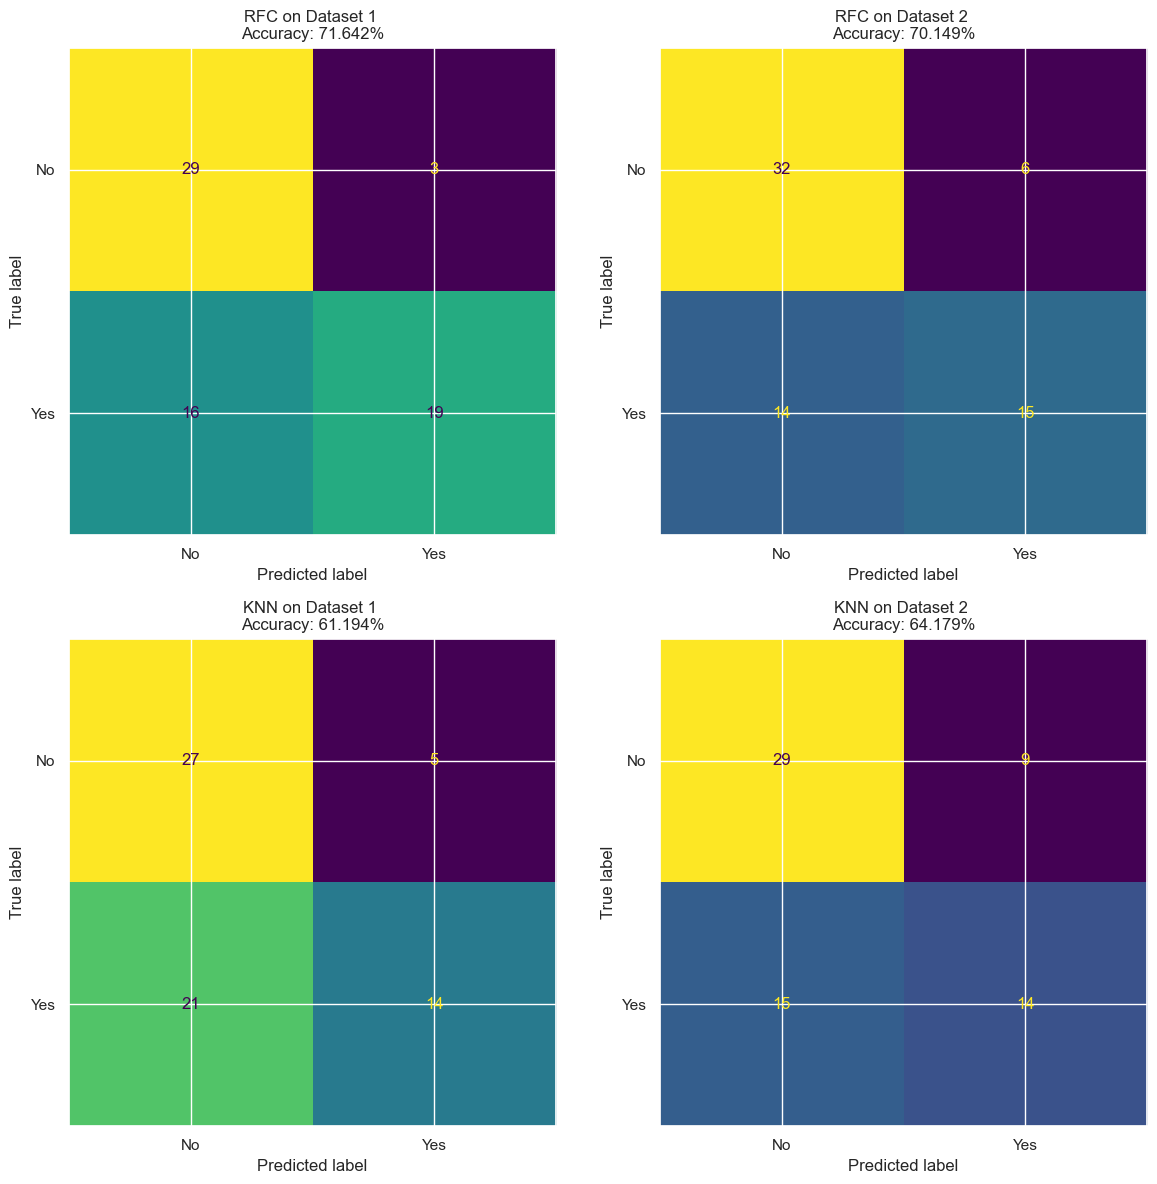

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs[0, 0].set_title("RFC on df 1")
axs[0, 1].set_title("RFC on df 2")
axs[1, 0].set_title("KNN on df 1")
axs[1, 1].set_title("KNN on df 2")

evaluate_model(df1_best_model, 'RFC on Dataset 1', axs[0, 0])
evaluate_model(df2_best_model, 'RFC on Dataset 2', axs[0, 1], df2=True)
evaluate_model(df1_best_model_knn, 'KNN on Dataset 1', axs[1, 0])
evaluate_model(df2_best_model_knn, 'KNN on Dataset 2', axs[1, 1], df2=True)

plt.tight_layout()
plt.show()

## 2.7 "Deploy" - save model

Start by selecting 100 randomly chosen rows from your dataset. Export these 100 samples to **test_samples.csv**. Then, take the best model and train it on all the data we have except for the 100 data points you selected. Then save the model in a .pkl file using ```joblib.dump()```. For the model, you may need to use the compress argument to compress the file size if it is too large.

In [72]:
df2.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_woman
0,50,110,80,1,1,0,0,1,0,22,0
1,55,140,90,3,1,0,0,1,1,35,1
2,52,130,70,3,1,0,0,0,1,24,1
3,48,150,100,1,1,0,0,1,1,29,0
4,48,100,60,1,1,0,0,0,0,23,1


## 2.8 Load the model

Create a new script: **production_model.py**, load **test_samples.csv** and your model. Use ```joblib.load()``` to load a .pkl file. Make predictions on the 100 data points and export a file “prediction.csv” that should contain the columns with filled values:

- probability class 0
- probability class 1
- prediction

In [73]:
test_samples = df2.sample(n=100)
test_samples.to_csv('test_samples.csv', index=False)

In [74]:
import joblib
joblib.dump(df2_best_model, 'trained_model.pkl')

['trained_model.pkl']

## 2.8.1 Import predictions

In [75]:
predictions = pd.read_csv('prediction.csv')
predictions.head(100)

,probability class 0,probability class 1,prediction
0,0.623181,0.376819,0
1,0.848734,0.151266,0
2,0.047292,0.952708,1
3,0.432450,0.567550,1
4,0.694780,0.305220,0
...,...,...,...
95,0.371073,0.628927,1
96,0.260829,0.739171,1
97,0.319710,0.680290,1
98,0.057083,0.942917,1
